# Felipe Felix de Oliveira Carneiro      0050014013

In [2]:
import pandas as pd
from sklearn.datasets import load_boston
dataset = load_boston()
data = pd.read_csv(dataset.filename, header=1)
#1 primeiros registros da tabela
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
#2 numero de observações e colunas
shape = data.shape
print('Numero de observações: {}'.format(shape[0]))
print('Numero de colunas: {}'.format(shape[1]))

Numero de observações: 506
Numero de colunas: 14


In [4]:
#3 Quantidade de features
print('Quantidade de Features: {}'.format(shape[1] - 1))

Quantidade de Features: 13


In [7]:
#4-Qual é o campo Target(respostas) dessa base?
print(data.columns[13])

MEDV


['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']


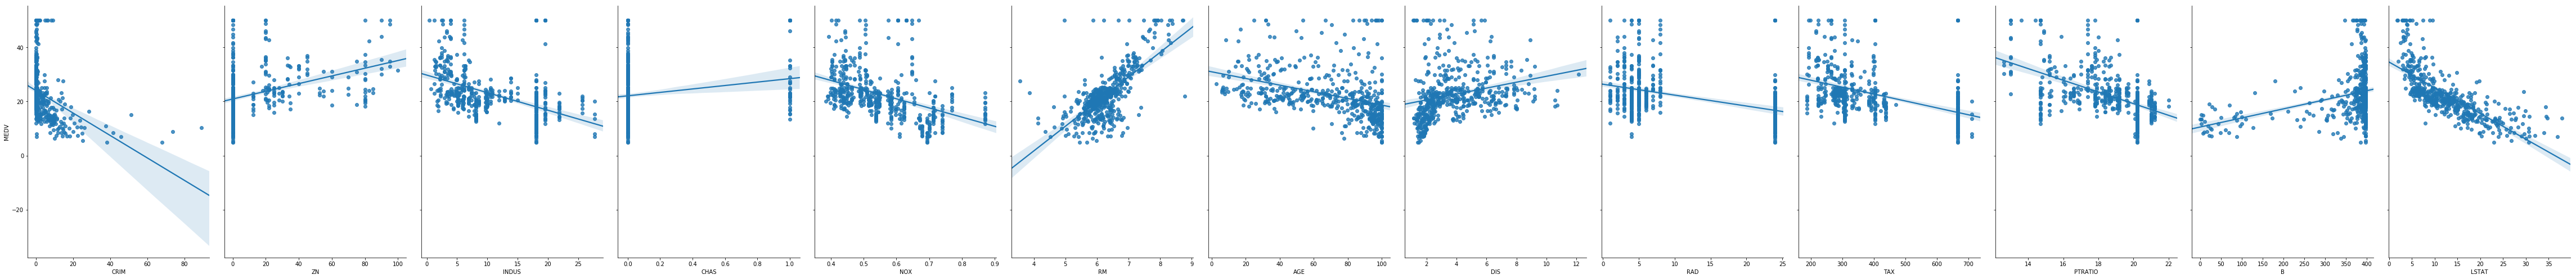

In [9]:
#5 Relação entre as features e responses
import seaborn as sns
%matplotlib inline
x_vars = []
for coluna in data.columns:
    x_vars.append(coluna)
x_vars.remove('MEDV')
sns.pairplot(data, x_vars=x_vars, y_vars='MEDV', height=7, aspect=0.7, kind='reg')
print(x_vars)

In [10]:
x_vars.remove('ZN')
x_vars.remove('INDUS')
x_vars.remove('NOX')
x_vars.remove('CHAS')
x_vars.remove('RAD')
x_vars.remove('TAX')
x_vars.remove('PTRATIO')
x_vars.remove('B')

['CRIM', 'RM', 'AGE', 'DIS', 'LSTAT']


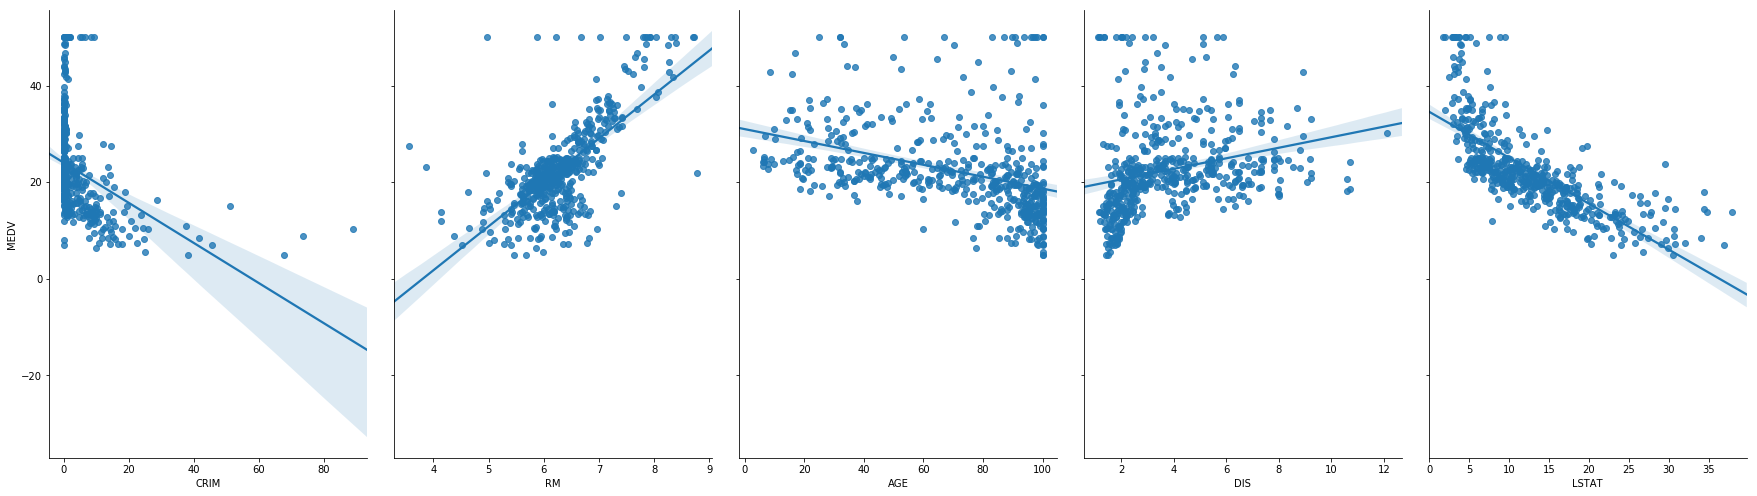

In [11]:
sns.pairplot(data, x_vars=x_vars, y_vars='MEDV', height=7, aspect=0.7, kind='reg')
print(x_vars)

In [12]:
#6 Prepare X e y usando o pandas
X = data[x_vars]
X.head()

,CRIM,RM,AGE,DIS,LSTAT
0,0.00632,6.575,65.2,4.0900,4.98
1,0.02731,6.421,78.9,4.9671,9.14
2,0.02729,7.185,61.1,4.9671,4.03
3,0.03237,6.998,45.8,6.0622,2.94
4,0.06905,7.147,54.2,6.0622,5.33


In [13]:
y = data.MEDV
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

In [14]:
#7 Tipo de dados de X e y
print(type(X))
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [15]:
#8-Sobre o que se trata essa base de dados? Que tipo de informações ela guarda?
print('Se trata da avaliação imobiliária de Boston. A base utiliza 13 features diferentes.') 

Se trata da avaliação imobiliária de Boston. A base utiliza 13 features diferentes.


In [16]:
#9 X de treino e y de treino, X de teste e y da base
#10 Percentual gerado para criar o conjunto de treino e o conjunto de teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(379, 5)
(379,)
(127, 5)
(127,)


In [17]:
#11 Usando modelo de regressão linear do sklearn, treine o modelo com o X e y de treino
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [18]:
#12 Imprima os atributos de "intercept" e "coefficients" que foram gerados
print(linreg.intercept_)
print(linreg.coef_)

8.1053099753775
[-0.11930409  4.34278945 -0.02651145 -0.6704084  -0.62517801]


In [19]:
#13 imprima o par "feature names" com os "coefficients"
list(zip(x_vars, linreg.coef_))

[('CRIM', -0.11930408970562636),
 ('RM', 4.3427894494397625),
 ('AGE', -0.026511449036942723),
 ('DIS', -0.6704083986414338),
 ('LSTAT', -0.6251780107446971)]

In [20]:
#14 Previsão usando o conjunto de X de teste
y_pred = linreg.predict(X_test)
print(y_pred)

[29.13813674 27.3547224  16.43068047 23.63771917 20.62128388 24.59941012
 29.90470797 20.71068265 18.30906936 26.63407272 27.67994454 29.99250626
 20.88955579 21.57307417 22.60705146 19.93769505 17.25230868 38.89782849
 24.99489561  7.23731983 20.95642519 18.21232256 26.0492476  27.86934724
 27.59328952 12.76070212 16.58085679 20.97781731 32.35590814 13.7249326
 25.10277372 13.68889682 36.91550551 19.7555215  24.30773963 22.58505783
 19.82603871 30.30171909  5.57163753 20.12009424 27.05945839 25.93344385
 27.68543304 14.97492708 18.45388589 18.883863   36.5971085  18.15040318
 24.12245166 25.16390671 27.08376036 22.57087768 27.14833562 24.37786557
  7.8230941  25.28024286 10.53117238 27.68911953 19.83318179 37.09662525
 21.33662017 28.34638588 15.97744422 19.97326837 10.43502943 31.8153334
 38.18173667 25.31226706 22.87900813 21.92592449 27.23890128  4.08288414
 16.86711753 24.3235471  22.2075234  22.46191751 32.55272769 25.23821718
 27.75177398 32.74788113 22.53902782 23.76417348 31.8

In [21]:
#15 Margem de error, usando o método "Root Mean Squared Error (RMSE)"
from sklearn import metrics
import numpy as np
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

5.330841919247638
